# Import Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.figure_factory as ff

%matplotlib inline

# Reading in the data set


In [ ]:
# Read in the dataset
polls = pd.read_csv("/content/presidential_poll_averages_2020.csv")

In [ ]:
# Show the table to see what the columns are like
polls

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wisconsin,7/23/2020,Joseph R. Biden Jr.,48.83257,48.65333
1,2020,West Virginia,7/23/2020,Joseph R. Biden Jr.,33.26179,33.78657
2,2020,Washington,7/23/2020,Joseph R. Biden Jr.,57.29990,57.95890
3,2020,Virginia,7/23/2020,Joseph R. Biden Jr.,49.46211,50.21471
4,2020,Utah,7/23/2020,Joseph R. Biden Jr.,37.20698,37.90867
...,...,...,...,...,...,...
11207,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325
11208,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662
11209,2020,California,2/27/2020,Donald Trump,34.66504,34.69761
11210,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208


# Preprocessing 

In [ ]:
# Drop the cycle column, constant 2020
polls = polls.drop('cycle', axis=1)

In [ ]:
# Convert to datetime object so dates display correctly
polls['modeldate'] = pd.to_datetime(polls['modeldate'])

In [ ]:
# Order the dates
polls = polls.sort_values('modeldate')

In [ ]:
# Remove the rows corresponding to regional averages
# National and NE-2 need to be removed
polls = polls.query('state != "National" and state != "NE-2"')

# Trump Biden US Splits

In [ ]:
# Difference in PCT Over the Course of 2020
df = polls.groupby(['candidate_name'], as_index=False, sort=False)[["pct_estimate"]].mean()
round(df,2)
   
df.columns = ['Candidate','Winning Percentage']

fig_1 =  ff.create_table(round(df,2))
fig_1.show()

In [ ]:
# Split by trump/biden
trump = polls[polls['candidate_name'] == "Donald Trump"]
biden = polls[polls['candidate_name'] == "Joseph R. Biden Jr."]
# Take the mean over all states for each candidate, grouping by date
avgtrump = trump.groupby('modeldate').mean()
avgbiden = biden.groupby('modeldate').mean()

<Figure size 1152x576 with 0 Axes>

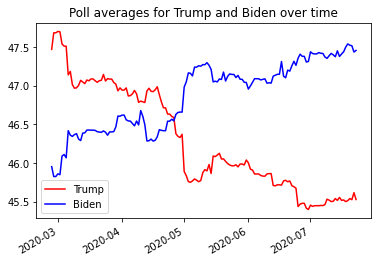

In [ ]:
#@title
# Plot poll averages comparing Trump and Biden over time
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
# Plot the trendlines for Trump and Biden
trumpline, = plt.plot(avgtrump.index, avgtrump['pct_estimate'], 'r')
trumpline.set_label('Trump')
bidenline, = plt.plot(avgbiden.index, avgbiden['pct_estimate'], 'b')
bidenline.set_label('Biden')
# Add the legend
ax.legend()
# Fix date display
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# Title
ax.set_title('Poll averages for Trump and Biden over time')
plt.show()

In [ ]:
# Largest drop in score for Trump
diffs = avgtrump['pct_estimate'].to_numpy()[1:] - avgtrump['pct_estimate'].to_numpy()[:-1]
print('Greatest drop: {:.4f}%'.format(np.min(diffs)))
print('On day: ', avgtrump.index[np.argmin(diffs)])
# What happened on this day that caused Trump's score to fall by so much?

Greatest drop: -0.4801%
On day:  2020-04-30 00:00:00


# Swing States (Texas, Florida, Ohio, Michigan)

<Figure size 1152x576 with 0 Axes>

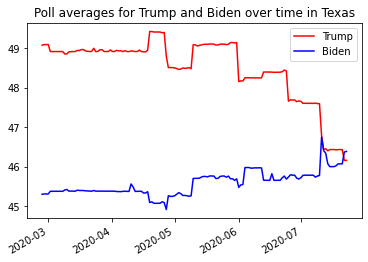

In [ ]:
# Texas State Visual 
texas_trump = trump[trump['state'] == "Texas"]
texas_biden = biden[biden['state'] == "Texas"]
# Take the mean over all states for each candidate, grouping by date
avgtrumptexas = texas_trump.groupby('modeldate').mean()
avgbidentexas = texas_biden.groupby('modeldate').mean()
# Plot poll averages comparing Trump and Biden over time
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
# Plot the trendlines for Trump and Biden
trumplinetexas, = plt.plot(avgtrumptexas.index, avgtrumptexas['pct_estimate'], 'r')
trumplinetexas.set_label('Trump')
bidenlinetexas, = plt.plot(avgbidentexas.index, avgbidentexas['pct_estimate'], 'b')
bidenlinetexas.set_label('Biden')
# Add the legend
ax.legend()
# Fix date display
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# Title
ax.set_title('Poll averages for Trump and Biden over time in Texas')
plt.show()

<Figure size 1152x576 with 0 Axes>

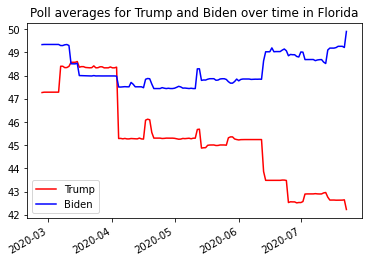

In [ ]:
# Florida State Visual 
florida_trump = trump[trump['state'] == "Florida"]
florida_biden = biden[biden['state'] == "Florida"]
# Take the mean over all states for each candidate, grouping by date
avgtrumpflorida = florida_trump.groupby('modeldate').mean()
avgbidenflorida = florida_biden.groupby('modeldate').mean()
# Plot poll averages comparing Trump and Biden over time
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
# Plot the trendlines for Trump and Biden
trumplineflorida, = plt.plot(avgtrumpflorida.index, avgtrumpflorida['pct_estimate'], 'r')
trumplineflorida.set_label('Trump')
bidenlineflorida, = plt.plot(avgbidenflorida.index, avgbidenflorida['pct_estimate'], 'b')
bidenlineflorida.set_label('Biden')
# Add the legend
ax.legend()
# Fix date display
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# Title
ax.set_title('Poll averages for Trump and Biden over time in Florida')
plt.show()

<Figure size 1152x576 with 0 Axes>

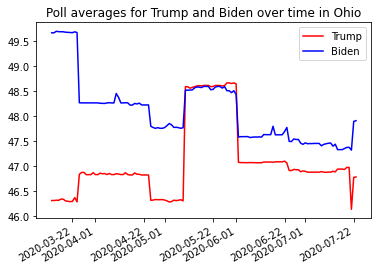

In [ ]:
# Ohio State Visual 
ohio_trump = trump[trump['state'] == "Ohio"]
ohio_biden = biden[biden['state'] == "Ohio"]
# Take the mean over all states for each candidate, grouping by date
avgtrumpohio = ohio_trump.groupby('modeldate').mean()
avgbidenohio = ohio_biden.groupby('modeldate').mean()
# Plot poll averages comparing Trump and Biden over time
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
# Plot the trendlines for Trump and Biden
trumplineohio, = plt.plot(avgtrumpohio.index, avgtrumpohio['pct_estimate'], 'r')
trumplineohio.set_label('Trump')
bidenlineohio, = plt.plot(avgbidenohio.index, avgbidenohio['pct_estimate'], 'b')
bidenlineohio.set_label('Biden')
# Add the legend
ax.legend()
# Fix date display
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# Title
ax.set_title('Poll averages for Trump and Biden over time in Ohio')
plt.show()

<Figure size 1152x576 with 0 Axes>

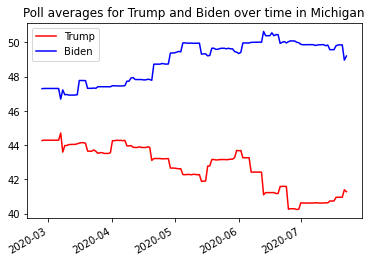

In [ ]:
# Michigan State Visual 
michigan_trump = trump[trump['state'] == "Michigan"]
michigan_biden = biden[biden['state'] == "Michigan"]
# Take the mean over all states for each candidate, grouping by date
avgtrumpmichigan = michigan_trump.groupby('modeldate').mean()
avgbidenmichigan = michigan_biden.groupby('modeldate').mean()
# Plot poll averages comparing Trump and Biden over time
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
# Plot the trendlines for Trump and Biden
trumplinemichigan, = plt.plot(avgtrumpmichigan.index, avgtrumpmichigan['pct_estimate'], 'r')
trumplinemichigan.set_label('Trump')
bidenlinemichigan, = plt.plot(avgbidenmichigan.index, avgbidenmichigan['pct_estimate'], 'b')
bidenlinemichigan.set_label('Biden')
# Add the legend
ax.legend()
# Fix date display
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# Title
ax.set_title('Poll averages for Trump and Biden over time in Michigan')
plt.show()

# States w/Highest % Diff in Latest Poll

In [ ]:
## filter data to show us the latest poll (7/23/2020)
trumplatest = trump[trump['modeldate'] == "7/23/2020"]
bidenlatest = biden[biden['modeldate'] == "7/23/2020"]

## set the state as index so we can merge the two df later
trumplatest.set_index('state', inplace = True)
## change index to "state"
bidenlatest.set_index('state', inplace = True)
#change col names for biden latest
bidenlatest.columns = ['date','candidate_name',
                     'pct_estimate_b','pct_trend_b']

## concatenate the two df
result = pd.concat([trumplatest, bidenlatest], axis=1, join='inner')
## create new column "pct_Diff" with diff in percentage by candidate by state
result['pct_Diff'] = result['pct_estimate'] - result['pct_estimate_b']
## Drop some unecessary columns
result = result.drop(['pct_trend_adjusted', 'date', 'pct_trend_b'], axis = 1) 
## convert % diff values into absolute
result['pct_Diff'] = result['pct_Diff'].abs()

#change col names for our results table
result.columns = ['Poll_Date','candidate_Name1',
                     'Trump Estimate', 'candidate_Name2', 'Biden Estimate', 'Percent Difference']
## sort results in descending order to view the largest % diff at the top
result.sort_values(by='Percent Difference', ascending=False) 
## view top 10 states with the largest percent difference 
top10 = result.nlargest(10,'Percent Difference')
print(top10)

# Reset index (should add the index as a new column)
top10.reset_index(inplace=True)
top10 = top10.round(2)
top10.drop(['Poll_Date', 'candidate_Name1', 'candidate_Name2'], inplace=True, axis=1)

# Draw the table
fig2 =  ff.create_table(top10)

fig2.show()

               Poll_Date candidate_Name1  ...  Biden Estimate Percent Difference
state                                     ...                                   
West Virginia 2020-07-23    Donald Trump  ...        33.26179           30.39288
Massachusetts 2020-07-23    Donald Trump  ...        62.61669           30.06266
California    2020-07-23    Donald Trump  ...        60.22560           27.09152
Maryland      2020-07-23    Donald Trump  ...        59.53051           24.36520
New York      2020-07-23    Donald Trump  ...        57.82076           24.24110
Oklahoma      2020-07-23    Donald Trump  ...        34.81102           23.32536
Washington    2020-07-23    Donald Trump  ...        57.29990           21.97503
Connecticut   2020-07-23    Donald Trump  ...        54.38664           19.41416
New Jersey    2020-07-23    Donald Trump  ...        55.01757           18.62081
Kentucky      2020-07-23    Donald Trump  ...        37.85457           18.41868

[10 rows x 6 columns]
